## Solar radiation prediction

Special thanks to:
* https://www.kaggle.com/sarahvch/investigating-solar-radiation
* https://www.kaggle.com/fashionlee/using-xgboost-for-regression
* https://www.kaggle.com/gilwassermann/solar-radiation-prediction-nb

This kernel includes solar radiation prediction using 5 different regression models.
Also added a solar radiation level forecast.

# Import Data

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# data_path = "../input/"
# df = pd.read_csv(data_path+"combined_data.csv")
# df.head()



data_path = 'E:/projects/SP/forcasting_SR_ML_model/dataset/mardan.csv'
# data_path = 'D:/projects/SP/Envirnment-condition/dataset/SolarPrediction.csv'

df = pd.read_csv(data_path)
df.head()





,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1.690000e+09,6/1/2023 23:55,23:55:26,1.21,16.68,2.04,11.60,94.89,96.14,6:13:00,18:13:00
1,1.690000e+09,6/1/2023 23:50,23:50:23,1.21,16.95,1.74,11.41,94.91,96.15,6:13:00,18:13:00
2,1.690000e+09,6/1/2023 23:45,23:45:26,1.23,17.41,1.48,11.23,94.96,96.21,6:13:00,18:13:00
3,1.690000e+09,6/1/2023 23:40,23:40:21,1.21,18.01,1.56,11.11,95.03,96.28,6:13:00,18:13:00
4,1.690000e+09,6/1/2023 23:35,23:35:24,1.17,18.62,2.02,11.11,95.09,96.33,6:13:00,18:13:00


In [63]:
# data=pd.read_csv('E:/projects/SP/forcasting_SR_ML_model/dataset/mardan.csv')
# data=pd.read_csv('D:/projects/SP/Envirnment-condition/dataset/SolarPrediction.csv')



In [64]:
# df.head()

In [65]:
# data = data.rename(columns={ 'WindDirection(Degrees)':'WindDirection'})

In [66]:
df = df.rename(columns={ 'WindDirection(Degrees)':'WindDirection'})


In [67]:
# data.head()


<Axes: >

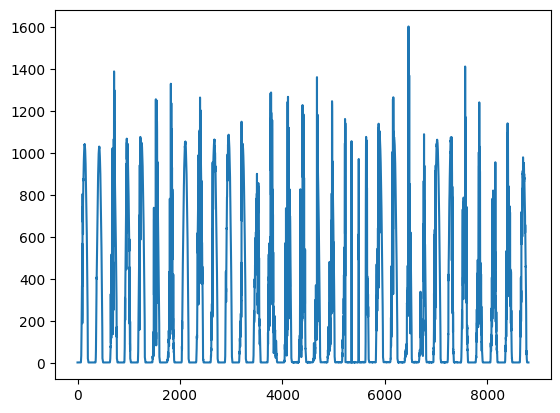

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# data['ghi_pyr'].plot()
data['Radiation'].plot()


<Axes: >

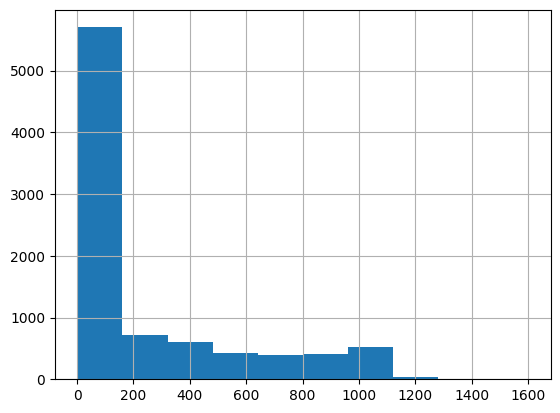

In [69]:
# df['ghi_pyr'].hist()
df['Radiation'].hist()


# Investigate Existing Correlations

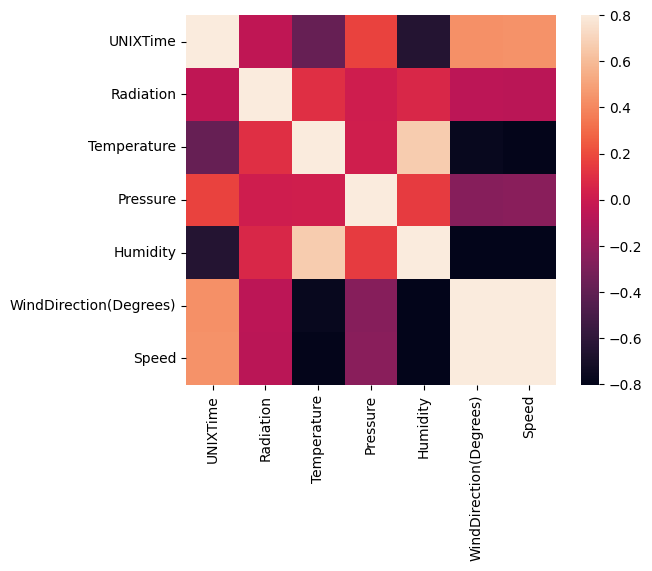

In [70]:
# data_numeric = data.select_dtypes(include=[np.number])

# # Compute correlation matrix
# corrmat = data_numeric.corr()

# # Plot heatmap
# sns.heatmap(corrmat, vmax=.8, square=True)
# plt.show()


# Convert datetime columns to numerical format if needed
# data['time'] = pd.to_datetime(data['time']).astype(int) / 10**9
# corrmat = data.corr()


# Exclude datetime columns
data_numeric = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corrmat = data_numeric.corr()

# Plot heatmap
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


# Checking Relationship between Radiation and Temp

Text(0.5, 0.98, 'Temp vs. Radiation')

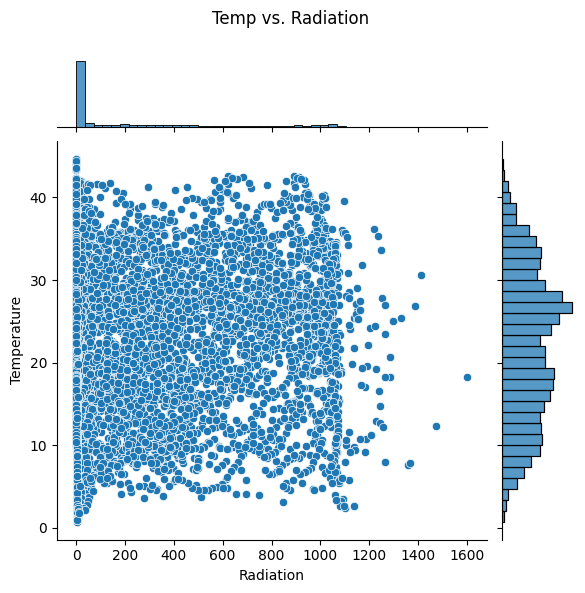

In [71]:
g = sns.jointplot(x="Radiation", y="Temperature", data=df)
# g = sns.jointplot(x="ghi_pyr", y="air_temperature", data=df)
plt.subplots_adjust(top=0.9)

g.fig.suptitle('Temp vs. Radiation')
# g.fig.suptitle('ghi_pyr vs. air_temperature ')


Text(0.5, 0.98, 'Temp vs. Humidity')

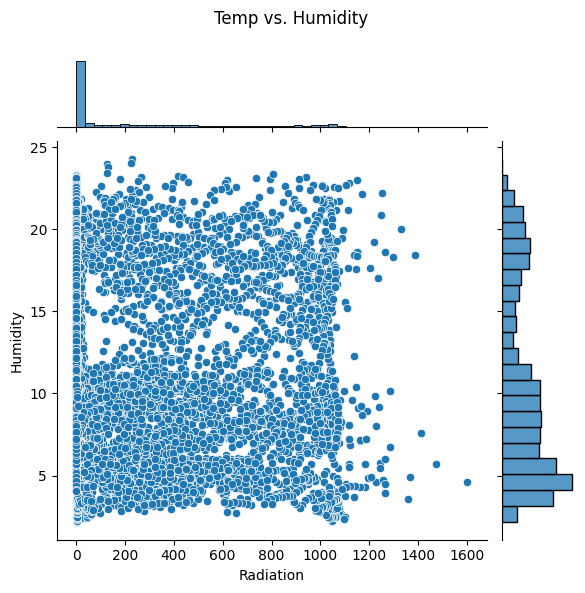

In [72]:
g = sns.jointplot(x="Radiation", y="Humidity", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Humidity')


# g = sns.jointplot(x="ghi_pyr", y="air_temperature", data=df)
# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('ghi_pyr vs. air_temperature')



In [73]:
# import zipfile

# # Path to the zip file
# zip_file_path = 'D:\projects\SP\Envirnment-condition\dataset\SolarPrediction.csv.zip'

# # Directory to extract files to
# extract_to_path = 'D:\projects\SP\Envirnment-condition\dataset'

# # Unzipping the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)


In [74]:
#drop low radiation values
# df = df[df['ghi_pyr'] >= 10]
df = df[df['Radiation'] >= 10]



# Feature Engineering

In [75]:
#Covert time to_datetime
#Add column 'hour'
df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
70,1.690000e+09,6/3/2023 18:05,18:05:22,10.96,21.41,2.22,12.88,94.81,96.03,6:13:00,18:13:00,1900-01-01 18:05:22,18,7,2023,12
71,1.690000e+09,6/3/2023 18:00,18:00:22,19.42,20.70,2.54,12.76,94.83,96.06,6:13:00,18:13:00,1900-01-01 18:00:22,18,7,2023,12
72,1.690000e+09,6/4/2023 17:55,17:55:22,27.14,20.88,2.55,13.00,94.86,96.09,6:13:00,18:13:00,1900-01-01 17:55:22,17,7,2023,12
73,1.690000e+09,6/4/2023 17:50,17:50:19,33.75,23.79,2.14,12.21,94.90,96.12,6:13:00,18:13:00,1900-01-01 17:50:19,17,7,2023,12
74,1.690000e+09,6/4/2023 17:45,17:45:22,49.57,26.77,1.16,11.47,94.95,96.15,6:13:00,18:13:00,1900-01-01 17:45:22,17,7,2023,12


# Data Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\3625899486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)


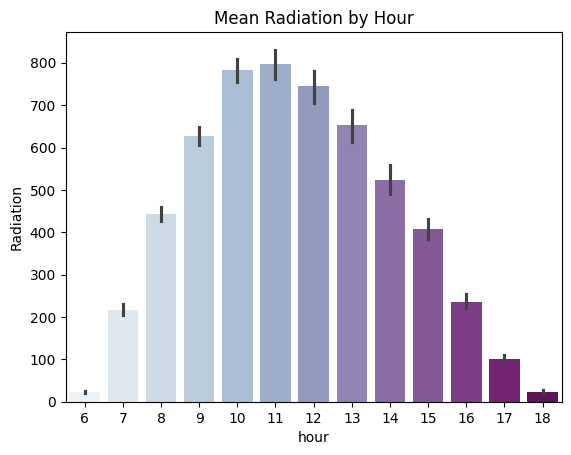

In [76]:
ax = plt.axes()
sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Hour')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\389810338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])


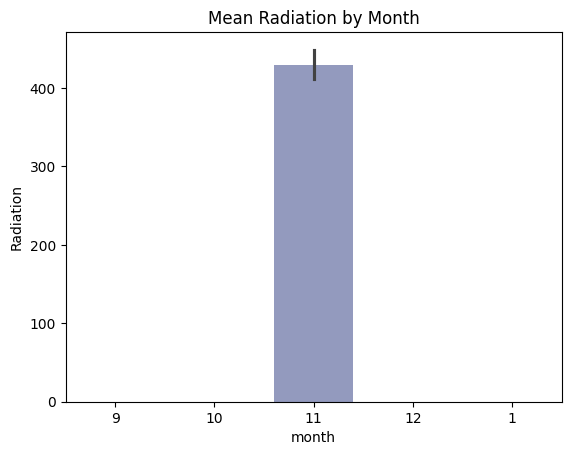

In [77]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\4041880140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)


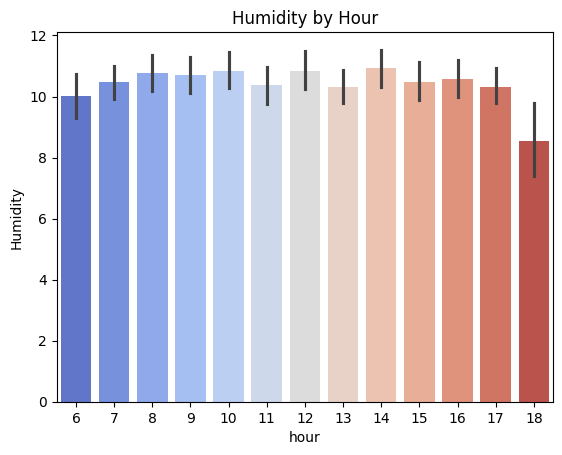

In [78]:
ax = plt.axes()
sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('Humidity by Hour')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\3363223595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)


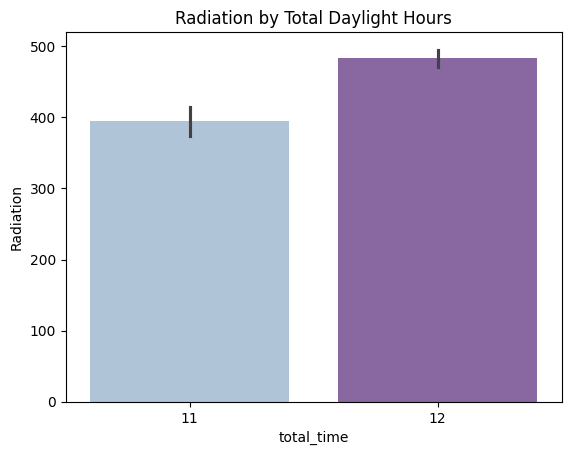

In [79]:
ax = plt.axes()
sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Radiation by Total Daylight Hours')
plt.show()

# Cluster Analysis

In [80]:
from sklearn.cluster import KMeans

In [81]:
# df = pd.read_csv(data_path+"SolarPrediction.csv")
df=pd.read_csv('E:/projects/SP/forcasting_SR_ML_model/dataset/mardan.csv')



X1 = df[['Temperature' , 'Humidity']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

e:\FOCUS\COMBINE-graphs-values-SR-flask\forcasting_SR_ML_model\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


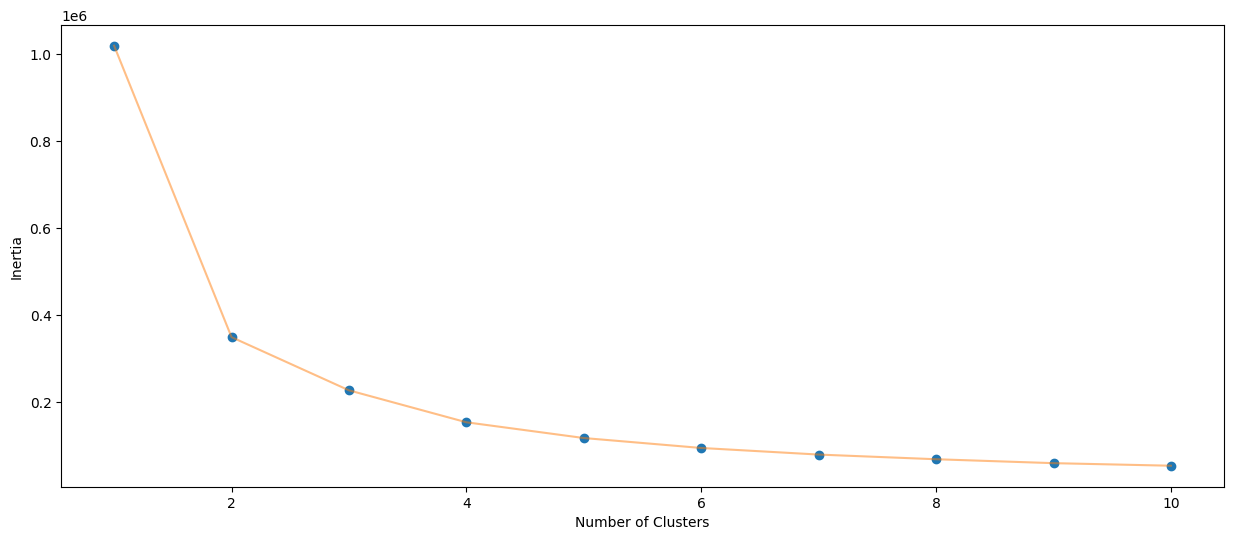

In [82]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [83]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [84]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

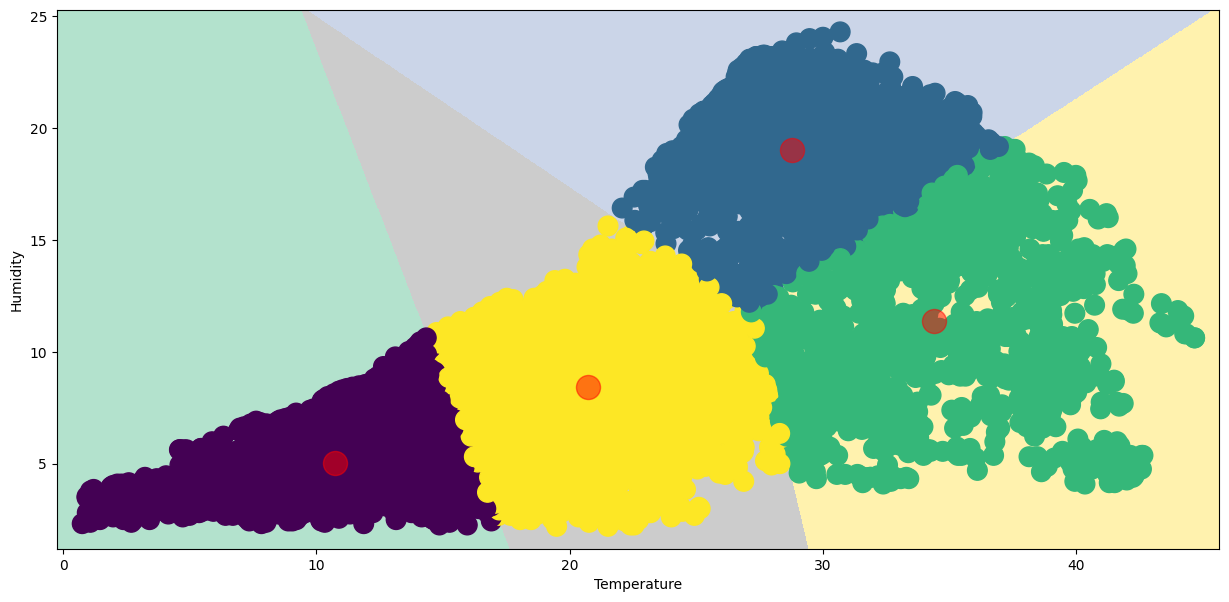

In [85]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Temperature' ,y = 'Humidity' , data = df , c = labels , 
            s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Humidity') , plt.xlabel('Temperature')
plt.show()

# Prediction

In [86]:
y = df['Radiation']
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1)

In [87]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

**Using LinearRegression**

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [89]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.37970359e+01 -9.53580865e+00  9.52067719e+00 -1.41241951e-01
  9.60250275e+02 -9.84679125e+02]


In [90]:
lpredictions = lm.predict( X_test)
print(lpredictions)

[291.24714392 256.09089006 195.62523333 ... 301.43009986 196.93066349
 235.23531929]


saving model

In [91]:
# import pickle

# # Save the model to a file
# with open('WD-updated-model.pkl', 'wb') as file:
#     pickle.dump(lm, file)


Text(0, 0.5, 'Predicted Y')

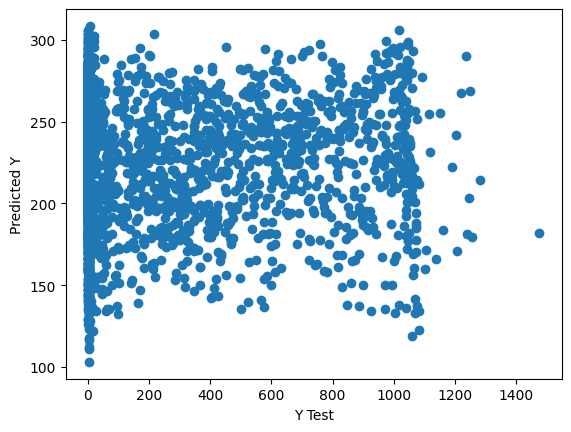

In [92]:
plt.scatter(y_test,lpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [93]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lpredictions))
print('MSE:', metrics.mean_squared_error(y_test, lpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lpredictions)))

MAE: 271.78009298773895
MSE: 112657.28159018348
RMSE: 335.6445762859628


In [94]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,-13.797036
Temperature,-9.535809
Pressure,9.520677
Humidity,-0.141242
WindDirection(Degrees),960.250275
Speed,-984.679125


**Using RidgeCV**

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)

RidgeCV(cv=5)

In [96]:
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [ -13.60159833   14.72942628    9.47380247    0.53566234  522.70410918
 -527.74979144]


In [97]:
rpredictions = ridge.predict( X_test)
print(rpredictions)

[287.88185984 250.75249985 193.7313732  ... 300.81359314 198.77212402
 236.25191643]


Text(0, 0.5, 'Predicted Y')

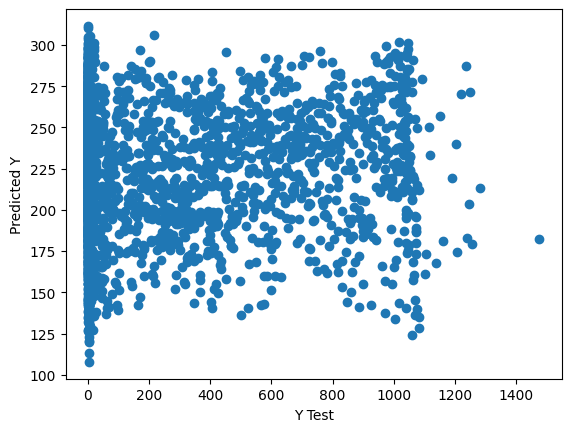

In [98]:
plt.scatter(y_test,rpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [99]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, rpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rpredictions)))

MAE: 271.8893620803098
MSE: 112679.90159093797
RMSE: 335.67827095440356


In [100]:
coeffecients = pd.DataFrame(ridge.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,-13.601598
Temperature,14.729426
Pressure,9.473802
Humidity,0.535662
WindDirection(Degrees),522.704109
Speed,-527.749791


**Using SGDRegressor**

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn import linear_model
sgd = linear_model.SGDRegressor(max_iter=1000)
sgd.fit(X_train,y_train)

SGDRegressor()

In [102]:
print('Coefficients: \n', sgd.coef_)

Coefficients: 
 [-9.38585638 40.10323266  5.77668502 -4.2355887  14.62004597  8.04302535]


In [103]:
spredictions = sgd.predict(X_test)
print(spredictions)

[251.98450444 222.68814062 203.97269222 ... 276.37025147 205.60200689
 217.74816269]


Text(0, 0.5, 'Predicted Y')

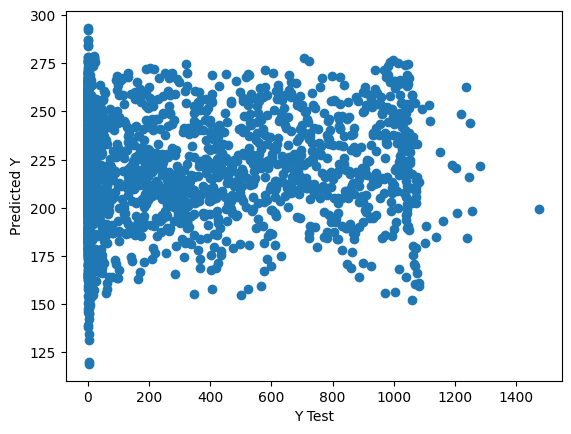

In [104]:
plt.scatter(y_test,spredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [105]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, spredictions))
print('MSE:', metrics.mean_squared_error(y_test, spredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, spredictions)))

MAE: 271.47807508138385
MSE: 112644.74199345664
RMSE: 335.625895892222


In [106]:
coeffecients = pd.DataFrame(sgd.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,-9.385856
Temperature,40.103233
Pressure,5.776685
Humidity,-4.235589
WindDirection(Degrees),14.620046
Speed,8.043025


> **Using AdaBoostRegressor**

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.ensemble import AdaBoostRegressor
abreg = AdaBoostRegressor(random_state=0, n_estimators=100)
abreg.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [108]:
abpredictions = abreg.predict( X_test)
print(abpredictions)

[319.9352963  368.52957909 367.15487712 ... 459.67898751 366.60967576
 459.67898751]


Text(0, 0.5, 'Predicted Y')

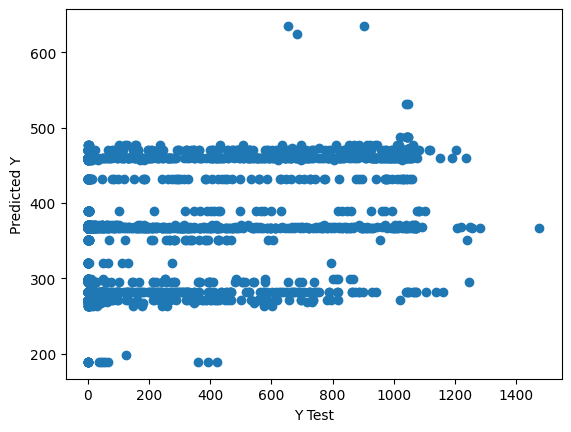

In [109]:
plt.scatter(y_test,abpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [110]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, abpredictions))
print('MSE:', metrics.mean_squared_error(y_test, abpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abpredictions)))

MAE: 327.2578987222203
MSE: 129880.82809352742
RMSE: 360.3898279551289


**Using XGBoost**

In [111]:
final_data=data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)

In [112]:
final_y=final_data.pop('Radiation')

In [113]:
final_x=final_data

In [114]:
# !pip install xgboost

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
import xgboost as xgb

In [116]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
xpredictions=final_gb.predict(tesdmat)
print(xpredictions)

[244.38763 196.14757 224.29324 ... 238.0291  201.06917 287.21216]


e:\FOCUS\COMBINE-graphs-values-SR-flask\forcasting_SR_ML_model\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [03:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Text(0, 0.5, 'Predicted Y')

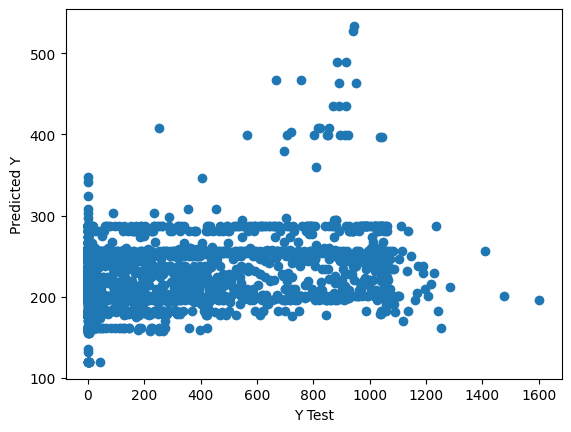

In [117]:
plt.scatter(y_test,xpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [118]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, xpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xpredictions)))

MAE: 264.3806539370048
MSE: 105557.77056796086
RMSE: 324.89655364124883


**Let`s check if there are any outliers in our dataset**

In [119]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
Outliers = (y < (Q1 - 1.5 * IQR)) |(y > (Q3 + 1.5 * IQR))


No outliers were found in the dataset which allows us to pick the most accurate model by comparing the mean absolute error values.

As we can see the XGBoost model seems to have the lowest rate of mean absolute error (MAE) which leads us to a conclusion that the XGBoost model is the most accurate in this kenrel.

# Forecast

Lets try and make a forecast about the solar radiation level in future.

In [120]:
# from fbprophet import Prophet

In [121]:
# !pip install git+https://github.com/facebook/prophet.git


In [122]:
# !pip install prophet

In [123]:
from prophet import Prophet


In [124]:
df = pd.DataFrame(data)

In [125]:
date_rad = df[['Data', 'Radiation']] 

<Axes: xlabel='Data'>

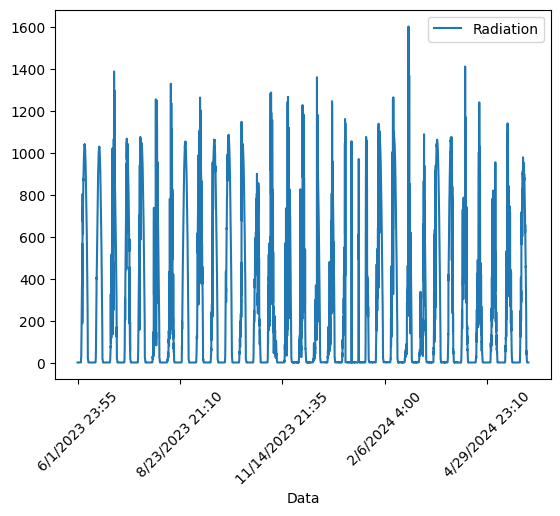

In [126]:
date_rad.plot(x='Data', y='Radiation', kind="line", rot=45)


In [127]:
date_rad = date_rad.rename(columns={'Data':'ds', 'Radiation':'y'})

<Axes: >

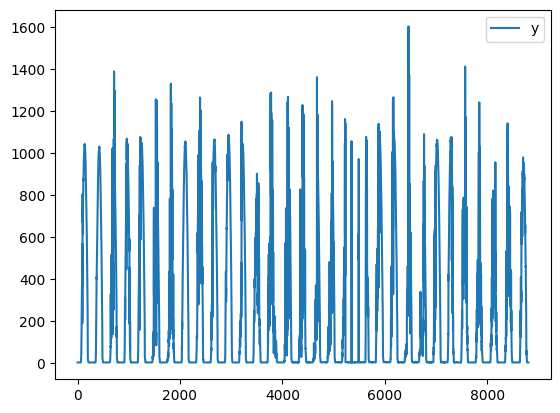

In [128]:
date_rad.plot()


In [129]:
p = Prophet()
p.fit(date_rad)

03:05:15 - cmdstanpy - INFO - Chain [1] start processing
03:05:19 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
future = p.make_future_dataframe(periods=1825)
forecast = p.predict(future)

In [ ]:
# forecast.to_csv('ijaz-rale.csv', index=False)

In [131]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10626,2029-05-27 05:50:00,-1412.554466,-27172.404033,21507.681533,-26902.071338,21738.678521,-223.526802,-223.526802,-223.526802,-236.774244,-236.774244,-236.774244,13.247442,13.247442,13.247442,0.0,0.0,0.0,-1636.081268
10627,2029-05-28 05:50:00,-1413.426582,-27209.257641,21487.871475,-26929.332574,21741.063914,-235.947591,-235.947591,-235.947591,-236.774244,-236.774244,-236.774244,0.826653,0.826653,0.826653,0.0,0.0,0.0,-1649.374173
10628,2029-05-29 05:50:00,-1414.298698,-27159.457817,21429.718878,-26956.593810,21751.789754,-213.781976,-213.781976,-213.781976,-236.774244,-236.774244,-236.774244,22.992268,22.992268,22.992268,0.0,0.0,0.0,-1628.080674
10629,2029-05-30 05:50:00,-1415.170814,-27132.991616,21596.604163,-26983.855046,21760.296213,-247.822545,-247.822545,-247.822545,-236.774244,-236.774244,-236.774244,-11.048301,-11.048301,-11.048301,0.0,0.0,0.0,-1662.993359
10630,2029-05-31 05:50:00,-1416.042930,-27248.241219,21488.601108,-27011.116282,21768.695571,-266.748009,-266.748009,-266.748009,-236.774244,-236.774244,-236.774244,-29.973764,-29.973764,-29.973764,0.0,0.0,0.0,-1682.790938


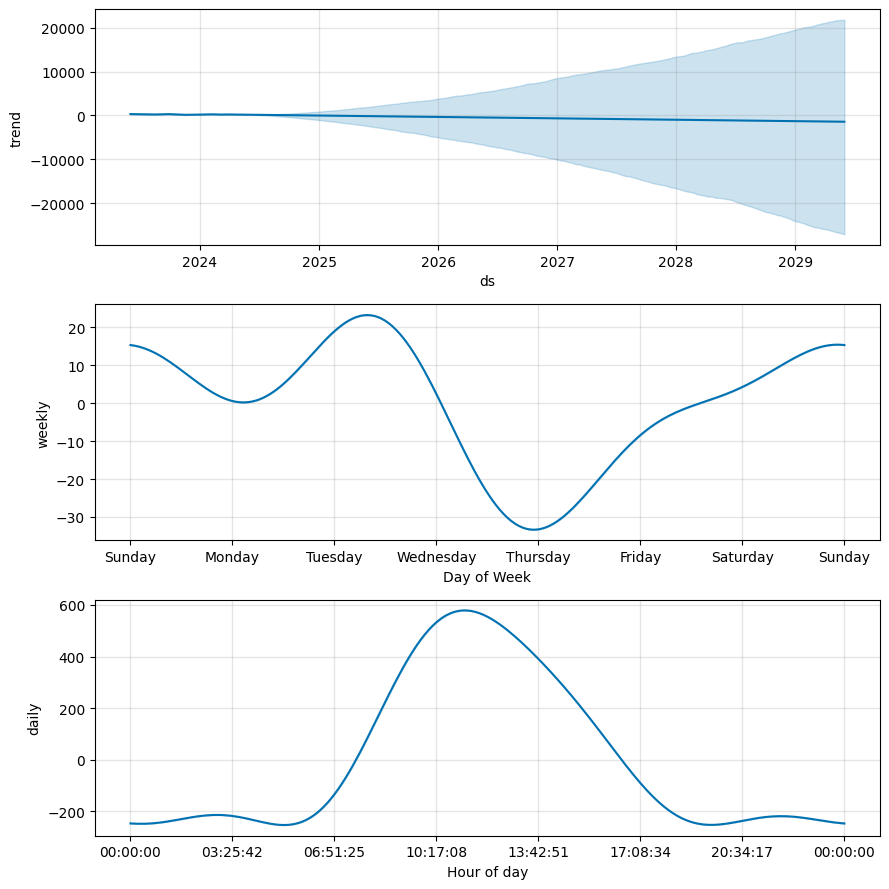

In [132]:
forecastplot = p.plot_components(forecast)

According to our forecast the radiation level is only going to increase in the nearest future.


Feel free to point out the mistakes you`ve found in this kernel.

Any feedback is highly appreciated.

Thanks for your time.

In [134]:
with open('updated_prphet_model.pkl', 'wb') as f:
    pickle.dump(p, f)

NameError: name 'pickle' is not defined

In [49]:
# import pandas as pd
# from prophet import Prophet
# import pickle

# # # Load your data
# # # date_rad = pd.read_csv('forecast.csv')
# date_rad = date_rad.rename(columns={'Data':'ds', 'Radiation':'y'})
# date_rad['ds'] = pd.to_datetime(date_rad['ds'])

# date_rad['ds'] = pd.to_datetime(date_rad['ds']).dt.date
# date_rad['y'] = date_rad['y'].astype(float)

# # Fit the model
# p = Prophet()
# p.fit(date_rad)

# Save the model
# with open('updated_prophet_model.pkl', 'wb') as f:
#     pickle.dump(p, f)


19:54:55 - cmdstanpy - INFO - Chain [1] start processing
19:54:56 - cmdstanpy - INFO - Chain [1] done processing
